<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prerequisites</a></span><ul class="toc-item"><li><span><a href="#Generate-Data" data-toc-modified-id="Generate-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generate Data</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Decision Tree Classifier</a></span><ul class="toc-item"><li><span><a href="#Tree-Visualization" data-toc-modified-id="Tree-Visualization-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Tree Visualization</a></span></li><li><span><a href="#Overfitting" data-toc-modified-id="Overfitting-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Overfitting</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Trees and Ensemble Models

## Prerequisites

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

### Generate Data

In [2]:
# Generate data : features take from normal distribution; Different classes have different mean
np.random.seed(42)
f_class_x = np.random.normal(size=(200,2), loc=0)
f_class_y = np.zeros(shape=200)
s_class_x = np.random.normal(size=(200,2), loc=1.5)
s_class_y = np.ones(shape=200)

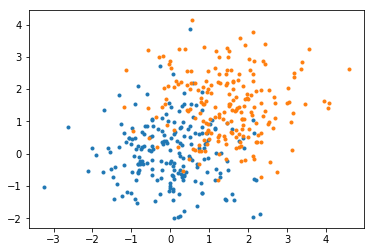

In [3]:
# Visualize
plt.plot(f_class_x[:, 0], f_class_x[:,1], ".");
plt.plot(s_class_x[:,0], s_class_x[:, 1], ".");

In [4]:
# Create dataset
X = np.concatenate([f_class_x, s_class_x])
y = np.concatenate([f_class_y, s_class_y])

## Modeling

### Decision Tree Classifier

Deciosion trees are classical and easily interpretable models. Little data preparation is required, numerical and categorical data can be handled. it is a good example of white-box model. Additional info ca be found [by link](https://scikit-learn.org/stable/modules/tree.html)

In [5]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
# Let's train decision tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
print("Train accuracy {}".format(accuracy_score(y_train, clf.predict(X_train))))
print("Test Accuracy {}".format(accuracy_score(y_test, clf.predict(X_test))))

Train accuracy 0.8357142857142857
Test Accuracy 0.875


#### Tree Visualization

Decision trees are easy to visualize, given tracktable tree size, let's do it.

In [8]:
import IPython.display
import pydotplus

from sklearn.externals.six import StringIO
def draw_tree_structure(clf, columns):
    dot_data=StringIO()
    tree.export_graphviz(clf, out_file=dot_data, feature_names=columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    t = IPython.display.Image(graph.create_png())
    IPython.display.display(t)

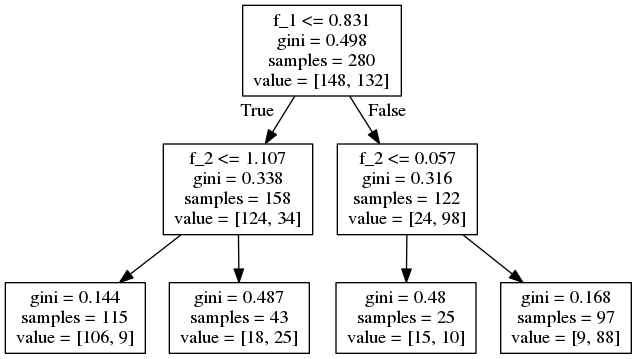

In [9]:
draw_tree_structure(clf, ["f_1", "f_2"])

In [10]:
def plot_surface(X,y,clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                 np.arange(y_min, y_max, 0.1))

    fig, ax = plt.subplots()
    z = clf.predict(np.c_[np.c_[xx.ravel(), yy.ravel()]])
    z = z.reshape(xx.shape);
    plt.contourf(xx, yy, z)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired);

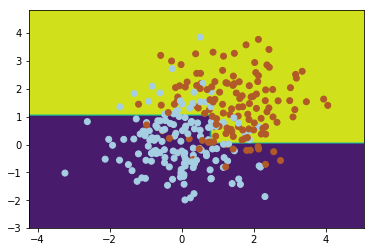

In [11]:
plot_surface(X_train, y_train, clf);

#### Overfitting

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=12)
clf.fit(X_train, y_train)

print("Train accuracy {}".format(accuracy_score(y_train, clf.predict(X_train))))
print("Test Accuracy {}".format(accuracy_score(y_test, clf.predict(X_test))))

Train accuracy 1.0
Test Accuracy 0.7833333333333333


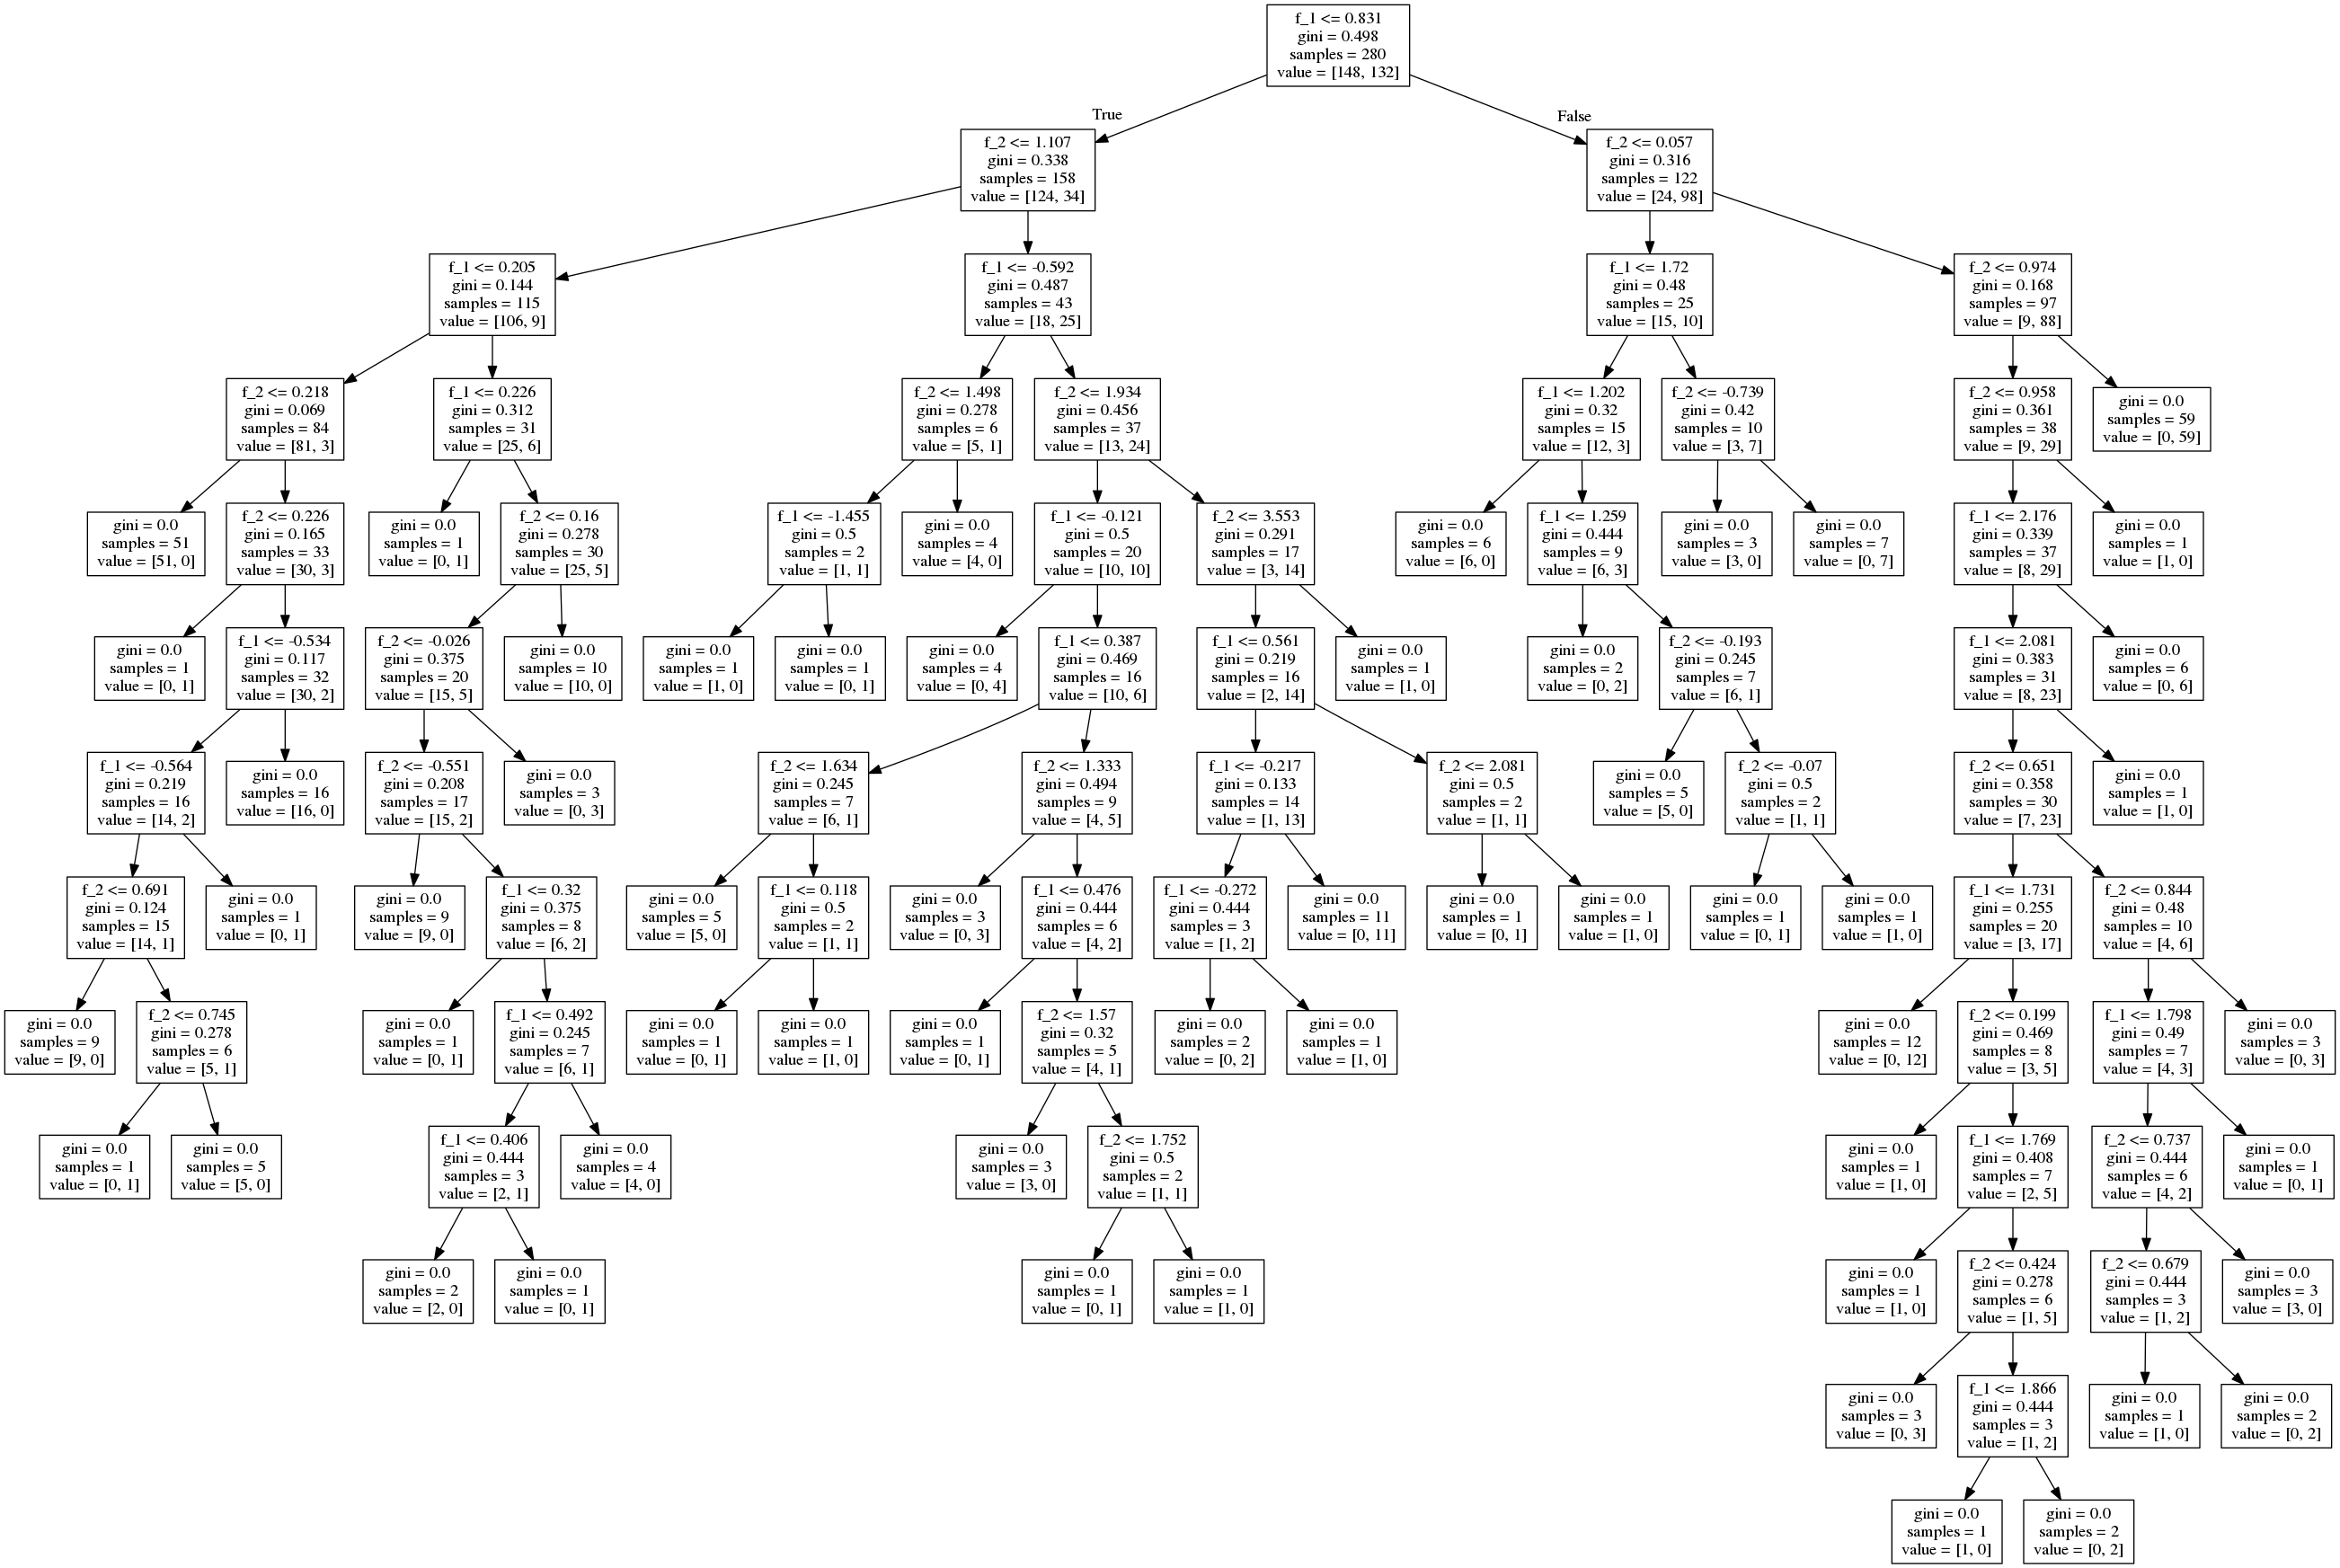

In [13]:
draw_tree_structure(clf, ["f_1", "f_2"])

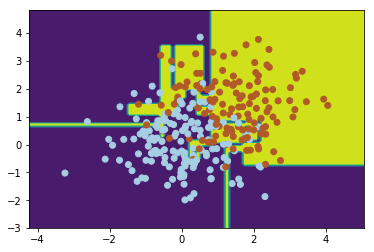

In [14]:
plot_surface(X_train, y_train, clf);

### Random Forest

[Random forest](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) is a popular example of ensemble methods. [Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees), by design, combine decisions of several estimators. These methods improve generalizability and robustness.

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

print("Test Accuracy {}".format(accuracy_score(y_train, rf.predict(X_train))))
print("Test Accuracy {}".format(accuracy_score(y_test, rf.predict(X_test))))

Test Accuracy 1.0
Test Accuracy 0.8583333333333333


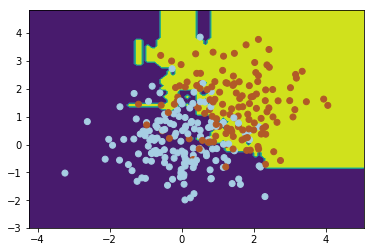

In [16]:
plot_surface(X_train, y_train, rf)

In [17]:
# Dependence of score of the number of etimators

n_estimators = range(10, 100, 10)
scores = []

for n_est in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=5, min_samples_leaf=10)
    rf.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, rf.predict(X_test)))

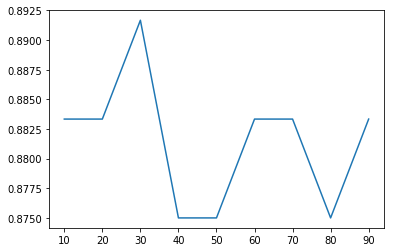

In [18]:
plt.plot(n_estimators, scores);

## Conclusion

Today you've got acquainted with decision trees and ensemble methods. The former ones are still quite often used in practice due to their interpretability, while the latter are popular due to their performance and robustness.